<a href="https://colab.research.google.com/github/fmpds/Ci-ncia-de-Dados/blob/master/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praticando com a API funcional do Keras

  Esse lab irá demonstrar como construir modelos com uma sintaxe funcional. Nós iremos construir um usando a API Sequencial e ver como podemos fazer o mesmo com a API Funcional. Ambos chegaram na mesma arquitetura.

### Importando bibliotecas

In [ ]:
import tensorflow as tf
import pydot

from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Model

#### API Sequencial

Primeiro, vamos entender como usar a classe Sequential() para construir um modelo.

In [ ]:
def build_model_sequential():

  # iniciando a classe Sequential() e linearmente add as camadas do nosso modelo
  seq_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                                          tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                          tf.keras.layers.Dense(10, activation = tf.nn.softmax)])
  return(seq_model)

### API Funcional

In [ ]:
def build_model_functional():

  # iniciando o input Tensor
  input_layer = tf.keras.Input(shape = (28, 28))

  # empilhando as camadas usando a sintaxe: new_layer()(previous_layer)
  flatten_layer = tf.keras.layers.Flatten()(input_layer)
  first_dense = tf.keras.layers.Dense(128, activation = tf.nn.relu)(flatten_layer)
  output_layer = tf.keras.layers.Dense(10, activation = tf.nn.softmax)(first_dense)

  # declarando inputs e outputs
  func_model = Model(inputs = input_layer, outputs = output_layer)

  return(func_model)

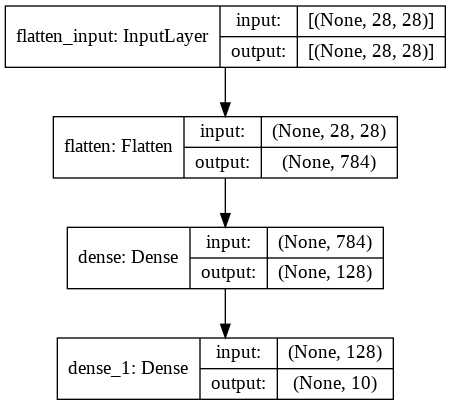

In [ ]:
model_sequential = build_model_sequential()

plot_model(model_sequential, show_shapes = True, show_layer_names = True, to_file = "model_sequential.png")

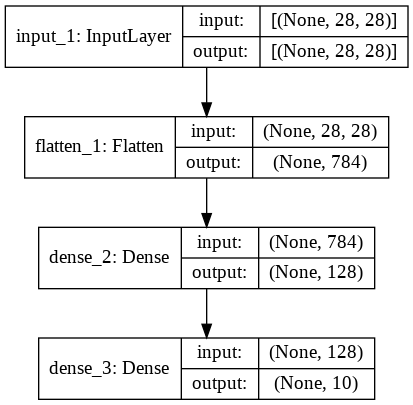

In [ ]:
model_functional = build_model_functional()

plot_model(model_functional, show_shapes = True, show_layer_names = True, to_file = "model_sequential.png")

### Treinando o modelo

Independente se foi criado um modelo com a API Sequential ou Functional, nós iremos seguir os mesmos passos quando treinamos e avaliamos nosso modelo. 

In [ ]:
# preparando a base de dados fashion mnist
mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# configurando, treinando e avaliando o modelo

model_functional.compile(optimizer = tf.optimizers.Adam(),
                         loss = 'sparse_categorical_crossentropy',
                         metrics = ['accuracy'])
model_functional.fit(train_images, train_labels, epochs = 5)
model_functional.evaluate(test_images, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6397 - accuracy: 0.7786
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3878 - accuracy: 0.8623
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3427 - accuracy: 0.8751
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3133 - accuracy: 0.8850
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3478 - accuracy: 0.8758


[0.34778892993927, 0.8758000135421753]

# Construindo modelos com multiplos outputs

Nesse lab, nós vamos aprender a construir modelos com mais de um output. O conjunto de dados que nós iremos trabalhar está disponível em [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency). Vamos ver como costruir e treinar o nosso modelo!

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

In [ ]:
# funções de apoio

def format_output(data):
  y1 = data.pop('Y1')
  y1 = np.array(y1)
  y2 = data.pop('Y2')
  y2 = np.array(y2)

  return(y1, y2)

In [ ]:
def norm(x):
  return((x - train_stats['mean']) / train_stats['std'])

In [ ]:

def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

## Preparando os dados

In [ ]:
# url do objeto
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'

# lendo arquivo
df = pd.read_excel(URL)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
# misturando os dados
df = df.sample(frac = 1).reset_index(drop = True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.90,563.5,318.5,122.5,7.0,2,0.10,4,29.06,29.34
1,0.74,686.0,245.0,220.5,3.5,3,0.25,1,12.50,15.50
2,0.90,563.5,318.5,122.5,7.0,3,0.00,0,21.46,25.38
3,0.69,735.0,294.0,220.5,3.5,2,0.00,0,6.85,11.74
4,0.76,661.5,416.5,122.5,7.0,5,0.40,3,39.68,40.10


In [ ]:
# dividindo os dados em dados de treino e teste, .8/.2
train, test = train_test_split(df, test_size = 0.2)
train_stats = train.describe()

# descrição estatistica dos dados
train_stats

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.764772,671.156352,318.619707,176.268322,5.261401,3.509772,0.236238,2.817590,22.378919,24.687671
std,0.106110,88.167459,43.483584,45.238499,1.751390,1.117444,0.133477,1.548335,10.090733,9.503739
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.040000,10.900000
25%,0.660000,612.500000,294.000000,122.500000,3.500000,3.000000,0.100000,2.000000,12.952500,15.645000
50%,0.760000,661.500000,318.500000,147.000000,7.000000,4.000000,0.250000,3.000000,19.090000,22.510000
75%,0.820000,759.500000,343.000000,220.500000,7.000000,4.750000,0.400000,4.000000,31.780000,33.205000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000,48.030000


In [ ]:
# selecionando Y1 e Y2 como outputas, e transformando eles em np.arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
X1,614.0,0.764772,0.106110,0.62,0.66,0.76,0.82,0.98
X2,614.0,671.156352,88.167459,514.50,612.50,661.50,759.50,808.50
X3,614.0,318.619707,43.483584,245.00,294.00,318.50,343.00,416.50
X4,614.0,176.268322,45.238499,110.25,122.50,147.00,220.50,220.50
X5,614.0,5.261401,1.751390,3.50,3.50,7.00,7.00,7.00
X6,614.0,3.509772,1.117444,2.00,3.00,4.00,4.75,5.00
X7,614.0,0.236238,0.133477,0.00,0.10,0.25,0.40,0.40
X8,614.0,2.817590,1.548335,0.00,2.00,3.00,4.00,5.00


In [ ]:
train_Y = format_output(train)
test_Y = format_output(test)

In [ ]:
# normalizando os dados
norm_train_X = norm(train)
norm_test_X = norm(test)

## Construindo o modelo

Aqui nós iremos construir o modelo utilizando a sintaxe da API functional. Note que nós podemos especificar uma lista de outputs(i.e [y1_output, y2_output]) quando o modelo é instanciado na classe Model().

In [ ]:
# definindo as camadas do modelo
input_layer = Input(shape=(len(train.columns), ))
first_dense = Dense(units = '128', activation = 'relu')(input_layer)
second_dense = Dense(units = '128', activation = 'relu')(first_dense)

# o output do Y1 vira diretamente da segunda camada densa
y1_output = Dense(units = '1', name = 'y1_output')(second_dense)
third_dense = Dense(units = '64', activation = 'relu')(second_dense)

#o output do Y2 vira da terceira camada densa
y2_output = Dense(units = '1', name = 'y2_output')(third_dense)

# definindo o modelo com a camada de entrada e a lista de camadas de saida
model = Model(inputs = input_layer, outputs = [y1_output, y2_output])

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           8256        dense_1[0][0]                    
______________________________________________________________________________________________

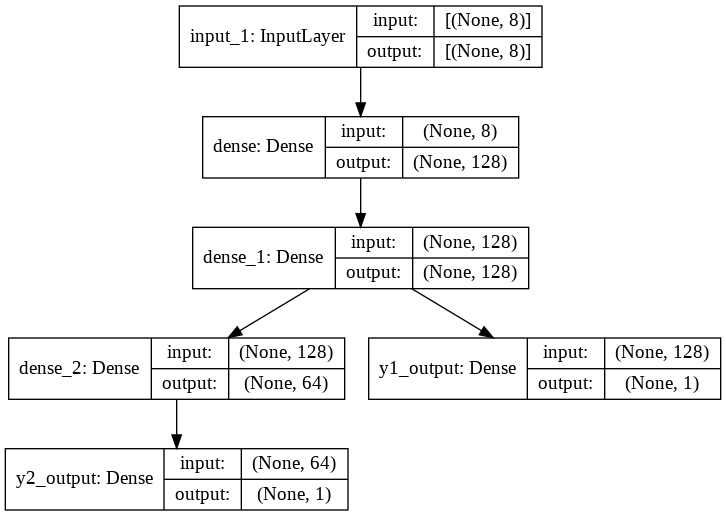

In [ ]:
plot_model(model, show_shapes = True, show_layer_names = True)

## Configurando os parametros

Nós vamos especificar o otimizador, bem como o erro e as metricas para cada output.

In [ ]:
# especificando um optimizer, e compilando o modelo com as funções de erro para cada output
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)

model.compile(optimizer = optimizer,
              loss = {'y1_output' : 'mse', 'y2_output' : 'mse'},
              metrics = {'y1_output' : tf.keras.metrics.RootMeanSquaredError(),
                         'y2_output' : tf.keras.metrics.RootMeanSquaredError()})

In [ ]:
# treinado o modelo para 500 epochs
history = model.fit(norm_train_X, train_Y, epochs = 500, batch_size = 10, validation_data = (norm_test_X, test_Y))

Epoch 1/500
62/62 [==============================] - 1s 10ms/step - loss: 470.8579 - y1_output_loss: 232.0412 - y2_output_loss: 238.8166 - y1_output_root_mean_squared_error: 14.6729 - y2_output_root_mean_squared_error: 14.7950 - val_loss: 61.4321 - val_y1_output_loss: 22.4635 - val_y2_output_loss: 38.9686 - val_y1_output_root_mean_squared_error: 4.7396 - val_y2_output_root_mean_squared_error: 6.2425
Epoch 2/500
62/62 [==============================] - 0s 2ms/step - loss: 35.2087 - y1_output_loss: 13.9226 - y2_output_loss: 21.2860 - y1_output_root_mean_squared_error: 3.7092 - y2_output_root_mean_squared_error: 4.5784 - val_loss: 31.6624 - val_y1_output_loss: 9.1617 - val_y2_output_loss: 22.5007 - val_y1_output_root_mean_squared_error: 3.0268 - val_y2_output_root_mean_squared_error: 4.7435
Epoch 3/500
62/62 [==============================] - 0s 2ms/step - loss: 32.4079 - y1_output_loss: 10.3365 - y2_output_loss: 22.0714 - y1_output_root_mean_squared_error: 3.2012 - y2_output_root_mean_sq

In [ ]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 2ms/step - loss: 1.2481 - y1_output_loss: 0.2817 - y2_output_loss: 0.9663 - y1_output_root_mean_squared_error: 0.5308 - y2_output_root_mean_squared_error: 0.9830
Loss = 1.2480618953704834, Y1_loss = 0.2817329466342926, Y1_mse = 0.5307852029800415, Y2_loss = 0.9663289189338684, Y2_mse = 0.9830203056335449


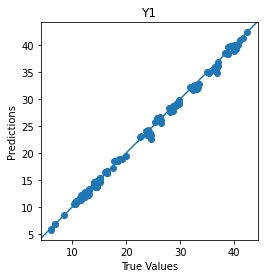

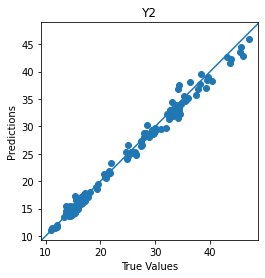

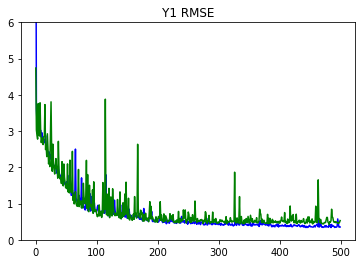

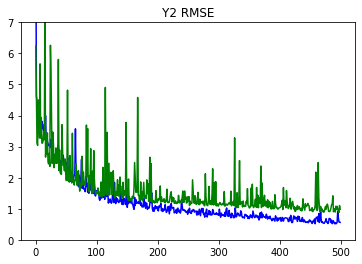

In [ ]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)

# Modelos com multiplos outputs com Keras Functional API

Nesse notebook, nós iremos utilizar a Keras Functional Api para treinar um modelo para predizer dois outputs. Para iss, utilizaremos [Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) do **UCI machine learning repository.** Ele contém base de dados separadas para vinhos brancos e vermelhos.

Normalmente, vinhos são classificados em uma das classificações de qualidade especificadas nos atributos. Aqui, só iremos combinar duas bases de dados para predizer a qualidade do vinho e se ele é vermelho ou branco, de acordo com seus atributos.

As estimativas de qualidade do modelo são um problema de regressão, enquanto que a detecção do tipo do vinho é um problema de clasificação binária.

### Importando bibliotecas

In [30]:
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import itertools

### Carregando o conjunto de dados

O conjunto de dados encontra-se disponível em [UCI Machinel Learning Repository.](https://archive.ics.uci.edu/ml/index.php)

### Pré-processando a base de dados de vinho branco

Nessa etapa, iremos adicionar no dataframe que contém apenas vinhos brancos a coluna 'is_red'.
- Se a coluna 'is_red' for igual a 0, quer dizer que o vinho não é vermelho.

In [2]:
# link para os dados
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# carregando os dados
white_df = pd.read_csv(URL, sep = ";")

# adicionando coluna 'is_red' com 0s
white_df['is_red'] = 0

# retirando duplicatas
white_df = white_df.drop_duplicates(keep = 'first')

# visualisando os dados
white_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,0
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5,0
11,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5,0
12,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,5,0
13,6.6,0.16,0.40,1.50,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,0


### Pré-processamento base de dados de vinho vermelho 

Nessa base de dados, a coluna 'is_red', vamos completar com 1s.

In [3]:
# link para os dados
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

# carregando os dados
red_df = pd.read_csv(URL, sep = ";")

# adicionando coluna 'is_red' com 0s
red_df['is_red'] = 1

# retirando duplicatas
red_df = red_df.drop_duplicates(keep = 'first')

# visualisando os dados
red_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,1


### Concatenando os conjuntos de dados

Agora que já temos as classes dos dados, indicadas pela coluna is_red, vamos concatenar os dataframes.

In [4]:
# concatenando os conjuntos de dados
df = pd.concat([red_df, white_df], ignore_index = True)

# misturando os conjuntos de dados
df = df.iloc[np.random.permutation(len(df))]

O gráfico abaixo mostra a distribuição da qualidade dos vinhos.

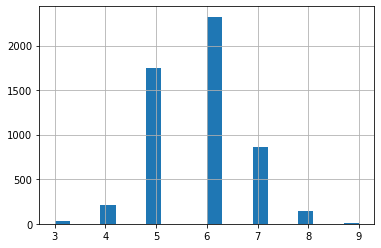

In [5]:
df['quality'].hist(bins = 20);

### Dados não balanceados

 Como podemos ver com o auxílio do plot, a qualidade dos vinhos não está balanceada.
 
 - Como temos poucas observações com a quailidade igual a 3, 4, 8 e 9, nós iremos retirar essas observações do nosso conjunto de dados. 

In [6]:
# retirando linhas baseado em condicionais no dataframe
df = df[(df['quality'] > 4.0) & (df['quality'] < 8.0)]

# resetando index
df = df.reset_index(drop = True)

Vamos plotar a distribuição de qualidade novamente, para ver o novo intervalo.


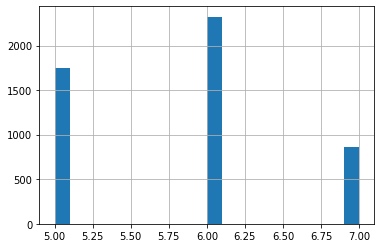

In [7]:
df['quality'].hist(bins = 20);

### "Train Test Split"

Agora, nós iremos dividir os dados entre dados de treinamento, dados de teste e dados de validação.

- O dataframe deve ser dividido com a proporção 0.8:0.2 para treino e teste respectivamente
- Os dados contidos no conjunto de treino, devem ser divididos com a proporção 0.8:0.2 para treino e validação.

In [8]:
# dividindo dados 0.8:0.2 treino e teste
train, test = train_test_split(df, test_size = 0.2, random_state = 1)

# dividindo dados de treino 0.8:0.2 treino e validação
train, val = train_test_split(df, test_size = 0.2, random_state = 1)

Agora, vamos exploras as estatisticas do conjuntode treino.

In [9]:
train_stats = train.describe()
train_stats.pop('is_red')
train_stats.pop('quality')
train_stats = train_stats.transpose()

train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3944.0,7.212018,1.314649,3.80000,6.4000,7.00000,7.70000,15.90000
volatile acidity,3944.0,0.338910,0.162430,0.08000,0.2300,0.29000,0.40000,1.33000
citric acid,3944.0,0.319391,0.145237,0.00000,0.2500,0.31000,0.40000,1.23000
residual sugar,3944.0,5.090403,4.536605,0.60000,1.8000,2.80000,7.52500,65.80000
chlorides,3944.0,0.057052,0.036982,0.01200,0.0380,0.04700,0.06600,0.61100
free sulfur dioxide,3944.0,30.455502,17.060922,1.00000,17.0000,29.00000,41.00000,131.00000
total sulfur dioxide,3944.0,114.910624,56.107486,6.00000,76.0000,117.00000,154.00000,344.00000
density,3944.0,0.994581,0.002960,0.98711,0.9923,0.99475,0.99676,1.03898
pH,3944.0,3.223268,0.157060,2.72000,3.1200,3.21000,3.32000,4.01000
sulphates,3944.0,0.532675,0.147182,0.22000,0.4300,0.51000,0.60000,1.98000


### Recolhendo as classes

As caracteristicas e as classes ainda estão no mesmo conjunto de dados.

In [10]:
def format_output(data):
  is_red = data.pop('is_red')
  is_red = np.array(is_red)
  quality = data.pop('quality')
  quality = np.array(quality)
  
  return (quality, is_red)

In [11]:
# recolhendo classes do conjunto de treino
train_Y = format_output(train)

# recolhendo classes do conjunto de validação
val_Y = format_output(val)

# recolhendo classes do conjunto de teste
test_Y = format_output(test)

### Normalizando os dados

Agora, vamos normalizar os dados com a seguinte função:
$$x_{norm} = \frac{x - \mu}{\sigma}$$

In [12]:
def norm(x):
  return ((x - train_stats['mean']) / train_stats['std'] )

In [13]:
# normalizando o conjunto de treinamento
norm_train_X = norm(train)

# normalizando o conjunto de validação
norm_val_X = norm(val)

# normalizando o conjunto de teste
norm_test_X = norm(test)

### Definindo o modelo

Vamos definir nosso modelo usando a API funcional.O nosso modelo base vai conter 2 camadas Densas **Dense** de 128 neuronios, com a função de ativação **relu**.

Para saber mais sobre veja a [documentação.](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

In [14]:
def base_model(inputs):

  # criando uma camada Densa com 128 neuronios e com a funcao de ativação relu
  x = Dense(units = '128', activation = 'relu')(inputs)

  # criando uma segunda camada Densa com 128 neuronios e com a funço de ativação relu
  x = Dense(units = '128', activation = 'relu')(x)

  return (x)

### Definindo as camadas de saída para o modelo

Nós iremos adicionar camadas de saída para o modelo. Como já vimos, nosso modelo precisará de duas sáidas.

Uma saída irá predizer a qualidade do vinho, a qual é um valor númerico. Então nós iremos:

- Definir uma camada Densa com 1 neuronio;
- Já que a saída é um número real, não precisamos definir uma função de ativação.

A outra camada de saída irá predizer o tipo do vinho, o qual é vermelho (1), ou não vermelho (0). Então nós iremos:

- Definir uma camada Densa com 1 neuronio;
- Já que a saída pode ser de duas categorias distintas, nós iremos utilizar uma função de ativação sigmoid para classificação binária.


In [33]:
def final_model(inputs):

  # recebendo o modelo base
  x = base_model_regularization(inputs=inputs)

  # conectando uma camada Densa para regressão
  wine_quality = Dense(units = '1', name = 'wine_quality')(x)

  # conectando uma camada Densa para classificação
  wine_type = Dense(units = '1', activation = 'sigmoid', name = 'wine_type')(x)

  # definindo o modelo e seus inputs e outpus
  model = Model(inputs = inputs, outputs = [wine_quality, wine_type])

  return (model)

# Compilando o modelo

Agora, vamos compilar o modelo. Como temos duas camadas de saída, precisamos definir duas funções de erro, uma para cada camada. Para isso, iremos utilizar um dicionario de pares chave-valor. Para saber mais sobre funções de erro, olhar a [documentação.](https://www.tensorflow.org/api_docs/python/tf/keras/losses#functions)

- **wine_type**: Usar função de erro *binary crossentropy*.

-**wine_quality**: Usar função de erro *mean squared error*

Ainda, vamos precisar também de duas metricas de avaliação para nosso modelo, que também podem ser passadas por um dicionario. Para saber mais sobre as metricas, veja a [documentação.](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

- **classificação:** para o tipo de vinho, utilizar a *accuracy*;
- **regressão:** para a qualidade do vinho, utilizar *root mean squared error*.

In [32]:
# definindo o shape do input
inputs = tf.keras.layers.Input(shape = (len(norm_train_X.columns), ))

rms = tf.keras.optimizers.RMSprop(learning_rate = 0.0001)

model = final_model(inputs = inputs)

model.compile(optimizer = rms, 
              loss = {'wine_type' : 'binary_crossentropy',
                      'wine_quality' : 'mse'
                      },
              metrics = {'wine_type' : 'accuracy',
                         'wine_quality' : tf.keras.metrics.RootMeanSquaredError()
                         }
              )

### Treinando o modelo

In [22]:
history = model.fit(norm_train_X, train_Y, 
                    epochs = 180, validation_data = (norm_test_X, test_Y))

Epoch 1/180
124/124 [==============================] - 2s 4ms/step - loss: 30.4987 - wine_quality_loss: 29.8051 - wine_type_loss: 0.6935 - wine_quality_root_mean_squared_error: 5.4515 - wine_type_accuracy: 0.4964 - val_loss: 15.7367 - val_wine_quality_loss: 15.0694 - val_wine_type_loss: 0.6673 - val_wine_quality_root_mean_squared_error: 3.8819 - val_wine_type_accuracy: 0.6444
Epoch 2/180
124/124 [==============================] - 0s 2ms/step - loss: 12.2181 - wine_quality_loss: 11.5695 - wine_type_loss: 0.6486 - wine_quality_root_mean_squared_error: 3.3914 - wine_type_accuracy: 0.7121 - val_loss: 4.7707 - val_wine_quality_loss: 4.1754 - val_wine_type_loss: 0.5953 - val_wine_quality_root_mean_squared_error: 2.0434 - val_wine_type_accuracy: 0.7305
Epoch 3/180
124/124 [==============================] - 0s 2ms/step - loss: 4.2528 - wine_quality_loss: 3.6971 - wine_type_loss: 0.5557 - wine_quality_root_mean_squared_error: 1.9188 - wine_type_accuracy: 0.7521 - val_loss: 2.7464 - val_wine_qua

In [23]:
loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

31/31 [==============================] - 0s 1ms/step - loss: 0.3809 - wine_quality_loss: 0.3578 - wine_type_loss: 0.0231 - wine_quality_root_mean_squared_error: 0.5982 - wine_type_accuracy: 0.9970

loss: 0.38088998198509216
wine_quality_loss: 0.3578191101551056
wine_type_loss: 0.023070892319083214
wine_quality_rmse: 0.598179817199707
wine_type_accuracy: 0.996960461139679


In [25]:
predictions = model.predict(norm_test_X)
quality_pred = predictions[0]
type_pred = predictions[1]

print(quality_pred[0])

[6.132475]


In [26]:
print(type_pred[0])
print(type_pred[944])

[0.99959266]
[0.9999868]


In [27]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

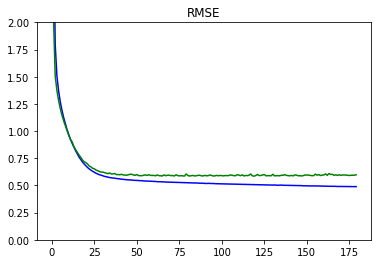

In [28]:
plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)

### Problema com overfiting

Como podemos ver, existe uma variância entre o resultado do conjunto de dados de treinamento e o conjunto de dados de desenvolvimento. Isso impede que nosso modelo generalize bem em novos dados. Para tentar corrigir isso, na proxima seção, iremos criar um modelo base com um método de regularização, o Dropout.

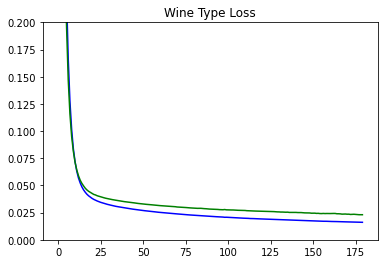

In [29]:
plot_metrics('wine_type_loss', 'Wine Type Loss', ylim=0.2)

### Dropout regularização



In [35]:
def base_model_regularization(inputs):

  x = Dense(units = '128', activation = 'relu')(inputs)

  x = Dropout(0.1, name="first_dropout")(x)
  
  x = Dense(units = '128', activation = 'relu')(x)

  return (x)

In [36]:
inputs = tf.keras.layers.Input(shape = (len(norm_train_X.columns), ))

rms = tf.keras.optimizers.RMSprop(learning_rate = 0.0001)

model = final_model(inputs = inputs)

model.compile(optimizer = rms, 
              loss = {'wine_type' : 'binary_crossentropy',
                      'wine_quality' : 'mse'
                      },
              metrics = {'wine_type' : 'accuracy',
                         'wine_quality' : tf.keras.metrics.RootMeanSquaredError()
                         }
              )

In [37]:
history = model.fit(norm_train_X, train_Y, 
                    epochs = 180, validation_data = (norm_test_X, test_Y))

Epoch 1/180
124/124 [==============================] - 1s 4ms/step - loss: 28.4432 - wine_quality_loss: 27.7380 - wine_type_loss: 0.7052 - wine_quality_root_mean_squared_error: 5.2590 - wine_type_accuracy: 0.4165 - val_loss: 14.2797 - val_wine_quality_loss: 13.5981 - val_wine_type_loss: 0.6815 - val_wine_quality_root_mean_squared_error: 3.6876 - val_wine_type_accuracy: 0.4701
Epoch 2/180
124/124 [==============================] - 0s 2ms/step - loss: 11.5354 - wine_quality_loss: 10.8656 - wine_type_loss: 0.6698 - wine_quality_root_mean_squared_error: 3.2859 - wine_type_accuracy: 0.5224 - val_loss: 4.4685 - val_wine_quality_loss: 3.8914 - val_wine_type_loss: 0.5771 - val_wine_quality_root_mean_squared_error: 1.9727 - val_wine_type_accuracy: 0.8460
Epoch 3/180
124/124 [==============================] - 0s 2ms/step - loss: 4.2790 - wine_quality_loss: 3.7437 - wine_type_loss: 0.5353 - wine_quality_root_mean_squared_error: 1.9294 - wine_type_accuracy: 0.8878 - val_loss: 2.5570 - val_wine_qua

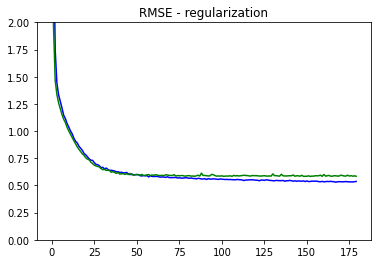

In [39]:
plot_metrics('wine_quality_root_mean_squared_error', 'RMSE - regularization', ylim=2)

### Resultado da aplicação da regularização

Como podemos ver, e como já era esperado, diminuimos a variancia ente o erro nos dados de treinamento e nos dados de teste.

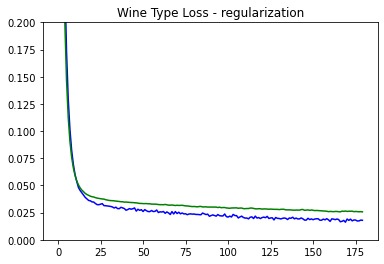

In [40]:
plot_metrics('wine_type_loss', 'Wine Type Loss - regularization', ylim=0.2)

In [41]:
loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

31/31 [==============================] - 0s 1ms/step - loss: 0.3672 - wine_quality_loss: 0.3415 - wine_type_loss: 0.0257 - wine_quality_root_mean_squared_error: 0.5844 - wine_type_accuracy: 0.9959

loss: 0.3671673834323883
wine_quality_loss: 0.34146827459335327
wine_type_loss: 0.02569909580051899
wine_quality_rmse: 0.5843528509140015
wine_type_accuracy: 0.9959473013877869


In [42]:
predictions = model.predict(norm_test_X)
quality_pred = predictions[0]
type_pred = predictions[1]

print(quality_pred[0])

[6.077708]


In [43]:
print(type_pred[0])
print(type_pred[944])

[0.9999508]
[0.99999034]
